## import necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from blitzml.tabular import Classification as bl

In [2]:
import warnings
warnings.filterwarnings('ignore') # to ignore pandas warnings

## load datasets

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [4]:
auto = bl(train, # train DataFrame
          test, # test DataFrame
          classifier = 'auto', # chosed classifier
          feature_selection='correlation', # will select columns with high correlation only
          validation_percentage = 0.1, # defualt 10% of train DataFrame will used for validation
          average_type = 'macro' # for multiclass classification metrics
         )

## perform entire process on datasets
### preprocessing, model training, predict test dataset, and calculate performance metrics

In [5]:
auto.run()

In [ ]:
# you can access generated DataFrames or metrics via ...

In [13]:
auto.model

GradientBoostingClassifier()

In [6]:
auto.metrics_dict

{'accuracy': 0.8651685393258427,
 'f1': 0.8064516129032258,
 'precision': 0.8620689655172413,
 'recall': 0.7575757575757576,
 'hamming_loss': 0.1348314606741573,
 'cross_validation_score': None}

In [7]:
auto.pred_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,1,34.500000,0,0,7.8292,0,1,0,0
1,893,3,0,47.000000,1,0,7.0000,0,0,1,0
2,894,2,1,62.000000,0,0,9.6875,0,1,0,0
3,895,3,1,27.000000,0,0,8.6625,0,0,1,0
4,896,3,0,22.000000,1,1,12.2875,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,29.842596,0,0,8.0500,0,0,1,0
414,1306,1,0,39.000000,0,0,108.9000,1,0,0,1
415,1307,3,1,38.500000,0,0,7.2500,0,0,1,0
416,1308,3,1,29.842596,0,0,8.0500,0,0,1,0


In [8]:
auto.validation_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
801,802,2,0,31.000000,1,1,26.2500,0,0,1,1
802,803,1,1,11.000000,1,2,120.0000,0,0,1,1
803,804,3,1,0.420000,0,1,8.5167,1,0,0,1
804,805,3,1,27.000000,0,0,6.9750,0,0,1,0
805,806,3,1,31.000000,0,0,7.7750,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0,0,1,0
887,888,1,0,19.000000,0,0,30.0000,0,0,1,1
888,889,3,0,29.842596,1,2,23.4500,0,0,1,0
889,890,1,1,26.000000,0,0,30.0000,1,0,0,0


In [9]:
auto.used_columns # columns selected by chosed feature_selection method

['Parch', 'Fare', 'Embarked_C', 'Pclass', 'Sex', 'Age', 'Embarked_S']

In [10]:
data =  auto.accuracy_history() # generate learning curves

In [11]:
data

{'x': array([ 72, 180, 288, 395, 503, 612, 720]),
 'y1': array([1.        , 0.97444444, 0.92951389, 0.92075949, 0.91153082,
        0.90441176, 0.89666667]),
 'y2': array([0.70625, 0.78625, 0.80125, 0.81   , 0.82375, 0.82   , 0.83   ]),
 'title': 'GradientBoostingClassifier learning curves'}

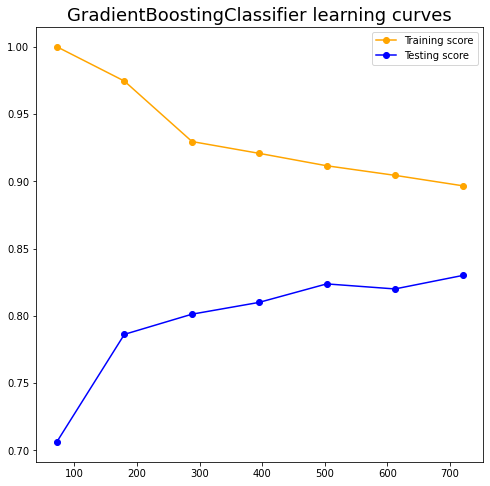

In [12]:
plt.figure(figsize=(8,8))
plt.plot(data['x'], data['y1'], 'o-', color="orange",label="Training score")
plt.plot(data['x'], data['y2'], 'o-', color="b",label="Testing score")
plt.title(data['title'],fontsize=18)
plt.legend()
plt.show()